In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [2]:
!kaggle datasets download -d shayanfazeli/heartbeat

 92% 91.0M/98.8M [00:00<00:00, 204MB/s]
100% 98.8M/98.8M [00:00<00:00, 188MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/heartbeat.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [2]:
import pandas as pd

In [3]:
normal = pd.read_csv('ptbdb_normal.csv', header=None)
abnormal = pd.read_csv('ptbdb_abnormal.csv', header=None)

In [7]:
df = pd.concat([normal, abnormal], ignore_index=True)

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [11]:
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]]
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.show()

In [12]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number])
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]]
    columnNames = list(df)
    if len(columnNames) > 10:
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

<ipython-input-11-45cf43a011c2>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


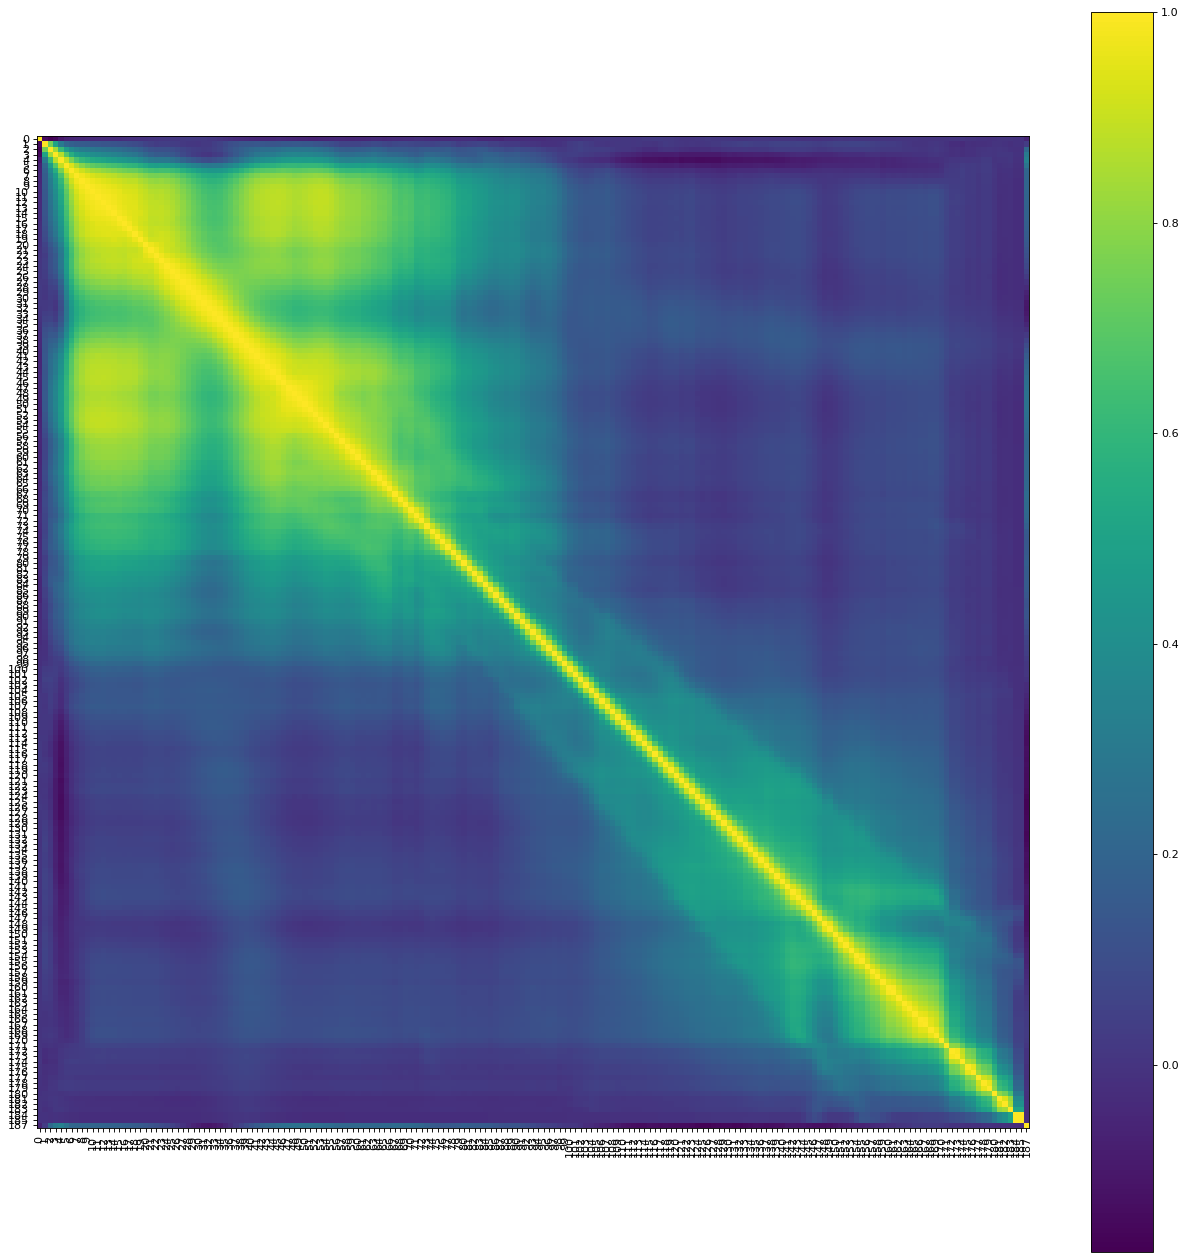

In [13]:
plotCorrelationMatrix(df , 20)

<ipython-input-12-5dfb404d6d0a>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


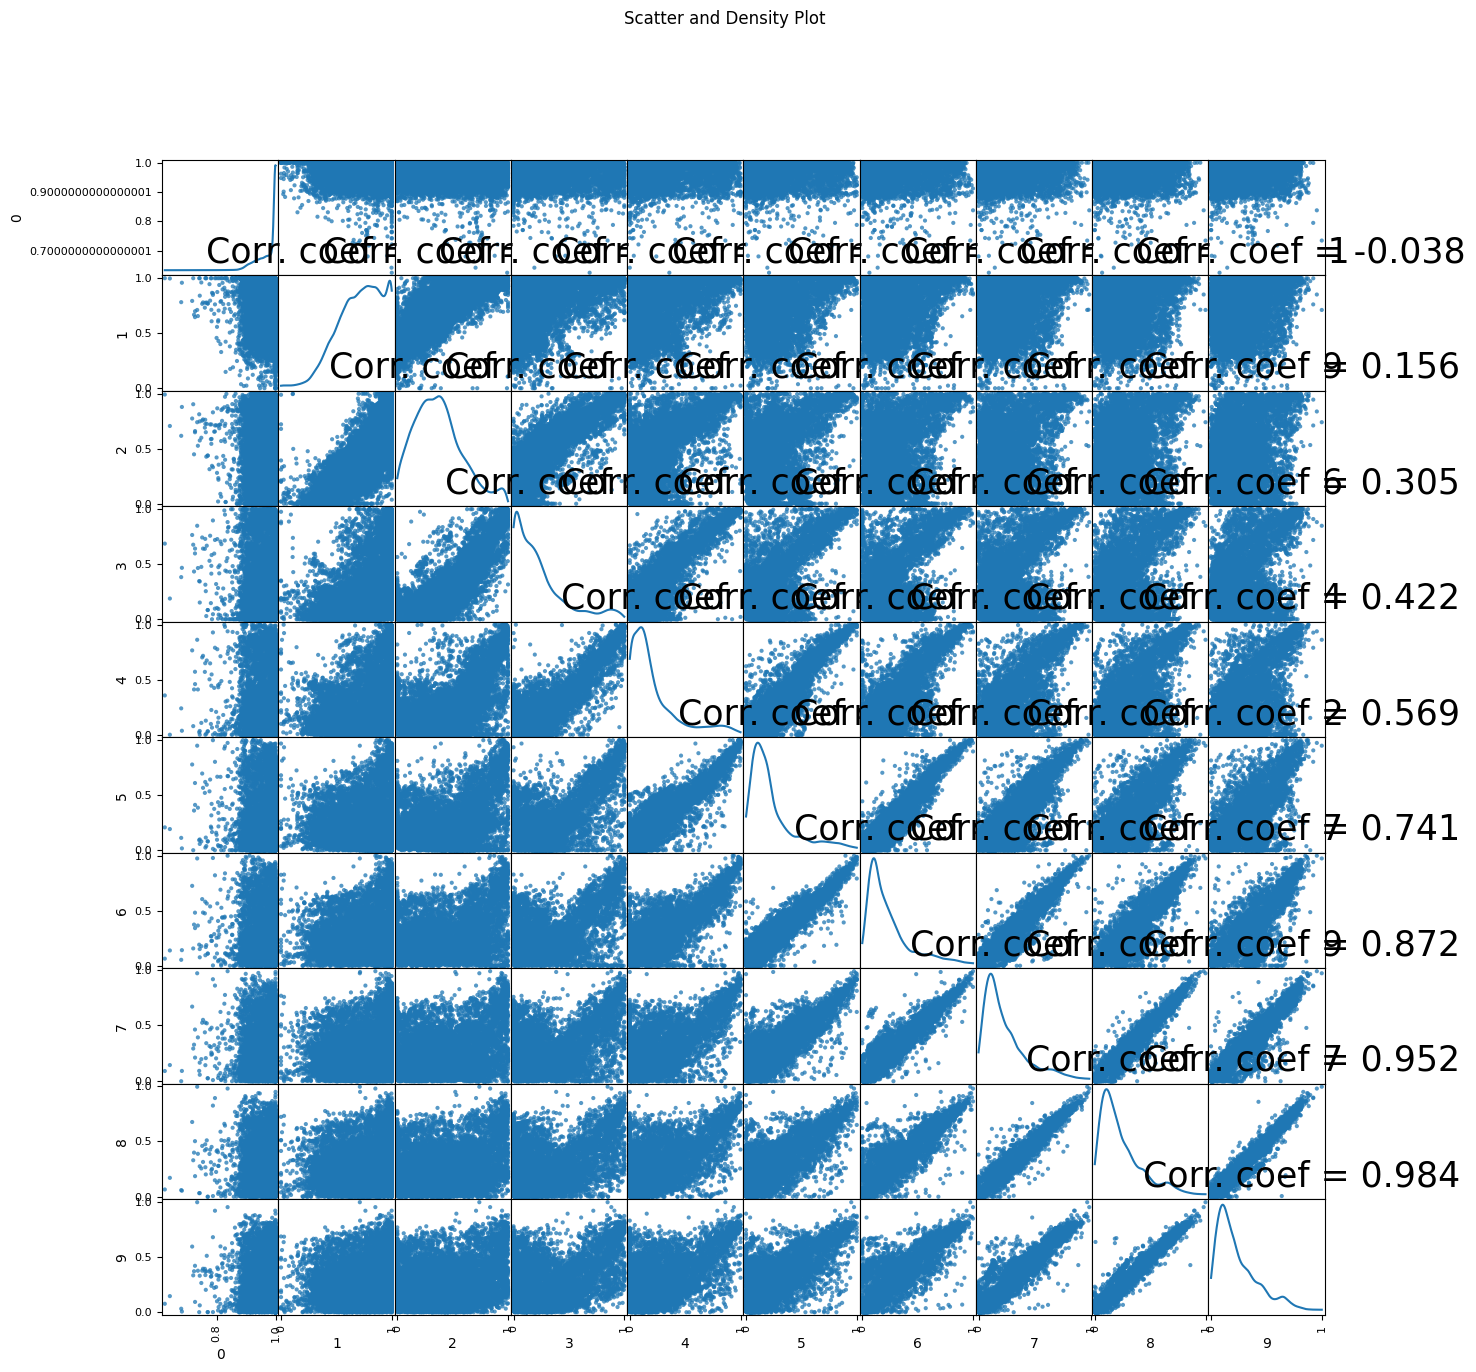

In [22]:
plotScatterMatrix(df , 15, 25)

In [23]:
scaler = StandardScaler()

In [24]:
x = df.drop([187], axis=1)

In [73]:
y = df[187].values

In [74]:
y

array([0., 0., 0., ..., 1., 1., 1.])

In [75]:
x_scaled = scaler.fit_transform(x)

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

Firstly using machine learning algorithims like SVM, RandomForest etc for creation of the model

In [77]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [78]:
svm = SVC(kernel='sigmoid', C=1.0, random_state=42)

In [79]:
svm.fit(x_train, y_train)

SVC(kernel='sigmoid', random_state=42)

In [80]:
predictions = svm.predict(x_test)

In [81]:
svm_accuracy = accuracy_score(y_test, predictions)

In [82]:
print('SVM Accuracy: ', svm_accuracy)

SVM Accuracy:  0.6856750257643421


In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [85]:
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [86]:
rf_preds = rf_classifier.predict(x_test)

In [87]:
rf_accuracy = accuracy_score(y_test, rf_preds)

In [88]:
print('Random Forest Accuracy: ', svm_accuracy)

Random Forest Accuracy:  0.6856750257643421


Now using a Neural Network

In [89]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout, BatchNormalization, Dense, Input

In [90]:
model = tf.keras.Sequential()

In [102]:
model.add(Input(shape=(187,)))

model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(1, activation="sigmoid"))

In [103]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [105]:
model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
364/364 [==============================] - 6s 16ms/step - loss: 0.3490 - accuracy: 0.8472 - val_loss: 0.2820 - val_accuracy: 0.8832
Epoch 2/50
364/364 [==============================] - 5s 13ms/step - loss: 0.3280 - accuracy: 0.8620 - val_loss: 0.2615 - val_accuracy: 0.8928
Epoch 3/50
364/364 [==============================] - 5s 15ms/step - loss: 0.3205 - accuracy: 0.8609 - val_loss: 0.2338 - val_accuracy: 0.9069
Epoch 4/50
364/364 [==============================] - 5s 14ms/step - loss: 0.3088 - accuracy: 0.8715 - val_loss: 0.2211 - val_accuracy: 0.9145
Epoch 5/50
364/364 [==============================] - 5s 13ms/step - loss: 0.3026 - accuracy: 0.8757 - val_loss: 0.2273 - val_accuracy: 0.9055
Epoch 6/50
364/364 [==============================] - 6s 16ms/step - loss: 0.2895 - accuracy: 0.8778 - val_loss: 0.2144 - val_accuracy: 0.9176
Epoch 7/50
364/364 [==============================] - 5s 13ms/step - loss: 0.2829 - accuracy: 0.8827 - val_loss: 0.1906 - val_accuracy: 0.9220

Using CNN

In [110]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

In [154]:
cnn_model = tf.keras.Sequential()

cnn_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(187, 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

In [155]:
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [156]:
cnn_model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
364/364 [==============================] - 7s 8ms/step - loss: 0.3922 - accuracy: 0.8110 - val_loss: 0.3103 - val_accuracy: 0.8640
Epoch 2/20
364/364 [==============================] - 3s 7ms/step - loss: 0.2562 - accuracy: 0.8977 - val_loss: 0.2614 - val_accuracy: 0.8945
Epoch 3/20
364/364 [==============================] - 2s 5ms/step - loss: 0.2071 - accuracy: 0.9186 - val_loss: 0.1584 - val_accuracy: 0.9457
Epoch 4/20
364/364 [==============================] - 2s 6ms/step - loss: 0.1701 - accuracy: 0.9329 - val_loss: 0.1142 - val_accuracy: 0.9602
Epoch 5/20
364/364 [==============================] - 2s 6ms/step - loss: 0.1386 - accuracy: 0.9473 - val_loss: 0.1044 - val_accuracy: 0.9656
Epoch 6/20
364/364 [==============================] - 2s 5ms/step - loss: 0.1198 - accuracy: 0.9545 - val_loss: 0.0916 - val_accuracy: 0.9711
Epoch 7/20
364/364 [==============================] - 2s 6ms/step - loss: 0.1035 - accuracy: 0.9601 - val_loss: 0.0802 - val_accuracy: 0.9756
Epoch 